## Integration and derivatives:

Many systems are represented dynamically and present the need for some simple calculus. Derivatives and integrals are important for these systems.

By the end of this file you should have seen simple numerical examples of:

1. Derivatives
2. Integrals
3. First order differential equations
4. Second order differential equations
5. First order coupled differential equations

Further reading:  
http://mathinsight.org/ordinary_differential_equation_introduction  
http://www.scipy-lectures.org/scipy.html  
https://github.com/scipy/scipy/blob/v0.19.0/scipy/integrate/odepack.py#L25-L230  

In [1]:
# Python imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.misc import derivative
from scipy import integrate

## Derivatives and Integrals:

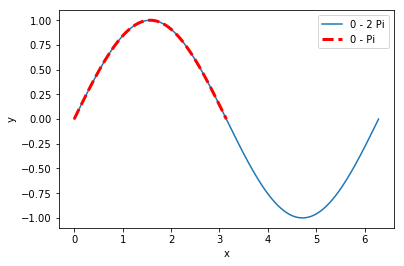

In [2]:
# Use sine function to demonstrate derivatives and integrals
X_Pi = np.linspace(0,np.pi,100)
X_2Pi = np.linspace(0,2*np.pi,200)

plt.plot(X_2Pi, np.sin(X_2Pi), label="0 - 2 Pi")
plt.plot(X_Pi, np.sin(X_Pi), linestyle="dashed", color='red',linewidth=3, label="0 - Pi" ) 
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y");

### Numerical Derivatives:

By hand:     
$\frac{d}{dx} Sin(x) = Cos(x)$ 

We can try at two different points:  
$\frac{d}{dx} Sin(\pi)  = -1$  
$\frac{d}{dx} Sin(2\pi) = 1$  

In [3]:
result = derivative(np.sin,np.pi,dx=1e-6) #Specifying the spacing helps get a more accurate answer
print("The derivative of sin(x) at x = pi is %0.3g" % result)

result = derivative(np.sin,2*np.pi,dx=1e-6)
print("The derivative of sin(x) at x = 2pi is %0.3g" % result)

The derivative of sin(x) at x = pi is -1
The derivative of sin(x) at x = 2pi is 1


### Numerical Integrals

By hand:   
$\int_0^1 Sin(x)dx = Cos(0)-Cos(1)$  
$=2$  

Using the built-in function, a technique from the fortran library QUADPACK (http://nines.cs.kuleuven.be/software/QUADPACK/):   

In [4]:
result, error = integrate.quad(np.sin,0,np.pi)
print("The integral of sine from 0 to pi is %g" % result)

result, error = integrate.quad(np.sin,0,2*np.pi)
print("The integral of sine from 0 to 2 pi is %g" % result) #this is essentially zero

The integral of sine from 0 to pi is 2
The integral of sine from 0 to 2 pi is 2.2215e-16


## First Order Ordinary Differential Equations:

These are differential equations that contain at least one independent variable and its derivatives. Ubiquitous in physics problems, a common example is a body that has both acceleration and velocity.


In [5]:
from scipy.integrate import odeint

Starting with the ODE:  
$ \frac{dy}{dx} + y = Sin(x) $      
and  
$ y(0) = 0 $

The solution is:  
$ y = \frac{1}{2}(Sin(x) - Cos(x) + e^{-x}) $ 

To see how this solution was determined by hand, please see Appendix I.

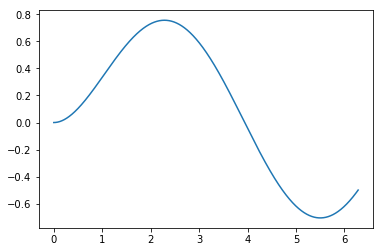

In [6]:
#Perform the calculation by hand:
X = np.linspace(0,2*np.pi,1000000)

Y_hand = 1/2.*(np.sin(X) - np.cos(X) + np.exp(-X))

plt.plot(X, Y_hand, label="y by hand" )
plt.show()

To leverage SciPy's `odeint` function, a python function is used to represent the ODE:

$ \frac{dy}{dx} = Sin(x) - y $ 

In [7]:
# Define the ODE as function, use odeint to determine numerical solution
def dy_dx(y, x):
    return np.sin(x) - y

However, for reasons that will become clear for higher order ODEs, it makes sense to use a change of variables: 
 
$ \frac{dy}{dx} = Sin(x) -\theta $    

where:  
$ \theta = y $ 

For `odeint`, the variable $z$ can be used to represent the variable of integration:   
$z = [\theta]$

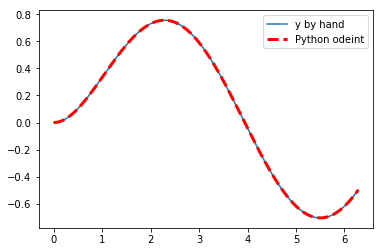

In [8]:
# Define the ODE as function, use odeint to determine numerical solution
def dy_dx(z, x):
    theta = z
    return np.sin(x) - theta

# Use the ODE function odeint
Y_calc = odeint(dy_dx, 0, X) 
Y_calc = np.array(Y_calc).flatten()

# Plot
plt.plot(X, Y_hand, label="y by hand")
plt.plot(X, Y_calc, linestyle="dashed", color='red',linewidth=3, \
         label="Python odeint")  
plt.legend(loc='best')
plt.show()

## Second Order Ordinary Differential Equations:

The variable reassignment above becomes more clear for the following second order differential:

$ \frac{dy^2}{dx}+3 \frac{dy}{dx} + 2y  = 0$  
and  
$y(0) = 0$  
$y'(0) = 1$  

For the solution, again reframe in terms of new variables:   
$ y''+ 3y' + 2y = 0 $  
or:  
$ \omega' = -3\omega - 2\theta $  

where:  
$ \theta = y $  
$ \omega = y' $   

The $z$ variable is again employed, only this time as an array of increasing order:  
$ z = [\theta, \omega] $   

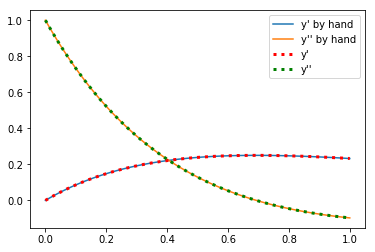

In [9]:
X = np.linspace(0, 1, 100)

def dy2_dx(z, x):
    theta = z[0] 
    omega = z[1] 
    f0 = -3*omega - 2*theta  # Define a relation in terms of first 
                             #    order ODEs 
    return (omega, f0)       # Output omega and the solution

y0 = (0,1) # Initial conditions - we determine what the values would 
           #    be at y=0 and y'=1
dy_dxs = odeint(dy2_dx, y0, X) # Outputs [omega, f0] or [y', y'']

plt.plot(X, -1*np.exp(-2*X) + np.exp(-X), label="y' by hand")
plt.plot(X, 2*np.exp(-2*X) - np.exp(-X), label="y'' by hand")

plt.plot(X, dy_dxs[:, 0], label="y'", linestyle="dotted", color='red', linewidth=3)
plt.plot(X, dy_dxs[:, 1], label="y''", linestyle="dotted", color='green', linewidth=3)
plt.legend()
plt.show()

Equivalently, $ z = [\theta, \omega] $  can be used as an array without referencing $ [\theta, \omega] $ explicitly, saving a couple of lines:

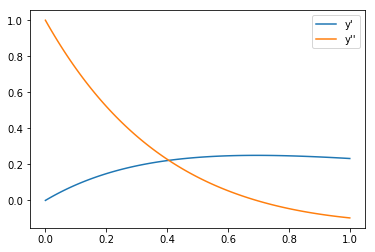

In [10]:
def dy2_dx(z, x):
    return (z[1], -3*z[1] -2*z[0])

dy_dxs = odeint(dy2_dx, (0,1), X) # Outputs [y', y'']

plt.plot(X, dy_dxs[:, 0], label="y'")
plt.plot(X, dy_dxs[:, 1], label="y''")
plt.legend()
plt.show()

## Coupled Ordinary Differential Equations:  

There are situations where a group of coupled equations dictate behavior. Here, a specific example is presented[1] that provides a numeric solution to the populations of three photophysical and electronic states of a fluorophore - a ground (S0), excited (S1), and triplet (T1) states. The three states are depicted in the figure below:  

<div align="center">
<img src="files/images/09-01_three_state_diagram.png" width=40%>
</div>  

Transitions between states are depicted by arrows and rates at which each of these transitions are represented as($k_{xx}$).   

Alternatively, we can represent this system using a set of coupled ordinary differential equations:  

$ \frac{d}{dt} \left( \begin{array}{c}
S_0(\bar{r},t) \\
S_1(\bar{r},t) \\
T_1(\bar{r},t) \\ \end{array} \right) 
= \left[ \begin{array}{ccc} 
-k_{01}(\bar{r},t) & k_{10} & k_T \\
k_{01}(\bar{r},t) & -(k_{ISC} + k_10) & 0  \\
0 & k_{ISC} &  -k_T  \\ \end{array} \right] \left( \begin{array}{c}
S_0(\bar{r},t) \\
S_1(\bar{r},t) \\
T_1(\bar{r},t) \\ \end{array} \right)  $  

That naturally give rise to:  
$[S_0(\bar{r},t) + S_1(\bar{r},t) + T_1(\bar{r},t)] = 1$, or 100% of the population. 

Thus, the series of coupled ODEs can represent the population of each state as a function of time, given a starting population and a numerically defined set of rates.

[1] Monitoring Kinetics of Highly Environment Sensitive States of Fluorescent Molecules by Modulated Excitation and Time-Averaged Fluorescence Intensity Recording
Tor Sandén,Gustav Persson,Per Thyberg,Hans Blom, and Jerker Widengren*
Analytical Chemistry 2007 79 (9), 3330-3341
DOI: 10.1021/ac0622680 

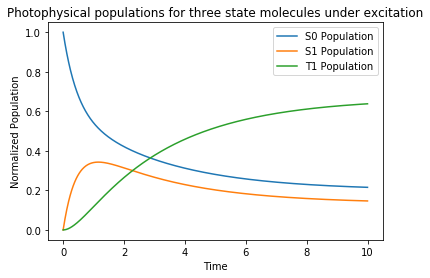

In [11]:
t = np.linspace(0, 10., 1000)         # time grid

# define the system dy/dt = d(y, t)
k01 = 1;     # S0 -> S1 rate
k10 = 1;     # S1 -> S0 rate
kisc = 0.5;  # S1 -> T1 rate
kT = 0.1;    # T1 -> S0 rate

def d(z, t):
    S0 = z[0]
    S1 = z[1]
    T1 = z[2]
    
    # the model equations (see Munz et al. 2009)
    dS0_dt = -k01*S0 + k10*S1 + kT*T1
    dS1_dt = k01*S0 -(kisc+k10)*S1 + 0*T1
    dT1_dt = 0*S0 + kisc*S1 - kT*T1
    return [dS0_dt, dS1_dt, dT1_dt]

# initial conditions
S0_0 = 1.                # initial S0 population
S1_0 = 0                 # initial S1 population
T1_0 = 0                 # initial T1 population
y0 = [S0_0, S1_0, T1_0]  # initial conditions


# solve the DEs
soln = odeint(d, y0, t)
S0 = soln[:, 0]
S1 = soln[:, 1]
T1 = soln[:, 2]

plt.figure()
plt.plot(t, S0, label='S0 Population')
plt.plot(t, S1, label='S1 Population')
plt.plot(t, T1, label='T1 Population')
plt.xlabel('Time')
plt.ylabel('Normalized Population')
plt.title('Photophysical populations for three state molecules under excitation')
plt.legend(loc='best')
plt.show()

Even though the rate into T1 (kisc) is slow, the rate out is even slower (kT), and thus the T1 populations build.

### Appendix I: Solution to the first order ODE, solved by hand

Starting with the ODE:  
$ \frac{dy}{dx} + y = Sin(x) $  

First, find the integration factor $\mu(x)$:  
$\mu(x) = e^{\int{1 dx}}$  
$       = e^x$

Multiply through by the integration factor:  
$ \frac{dy}{dx}e^x + ye^x = Sin(x)e^x $  

Integrate both sides:  
$ \int{ (\frac{dy}{dx}e^x + ye^x) }dx = \int (Sin(x)e^x) dx $  
$ ye^x = \int (Sin(x)e^x)dx $ 

Then, use integration by parts twice to find the integral of $ Sin(x)e^x $:  
$\qquad \int (Sin(x)e^x) dx $

$\qquad \int{udv} = uv-\int{vdu} $  
$\qquad  u = e^x \qquad dv = Sin(x)  $  
$\qquad  du = e^x \qquad v = -Cos(x) $  

$\qquad \int (Sin(x)e^x) dx  = -e^x Cos(x) - \int (-Cos(x)e^x)dx $  
A second time:  
$\qquad \int (Sin(x)e^x) dx  = -e^x Cos(x) + e^x Sin(x) - \int (Sin(x)e^x)dx $  
or  
$\qquad \int (Sin(x)e^x) dx = \frac{1}{2}e^x(Sin(x)-Cos(x)) + C $

Thus:  
$ ye^x = \frac{1}{2}e^x(Sin(x)-Cos(x)) + C $   
or   
$ y = \frac{1}{2}(Sin(x)-Cos(x)) + Ce^{-x} $ 

We can check by substituting:   
$ y = \frac{1}{2}(Sin(x)-Cos(x)) + Ce^{-x} $  
$ \frac{dy}{dx} = \frac{1}{2}(Cos(x)+Sin(x)) + -Ce^{-x} $  
into:
$ \frac{dy}{dx} +y = Sin(x) $  
yielding:  
$ [\frac{1}{2}(Cos(x)+Sin(x)) + -Ce^{-x}] + [\frac{1}{2}(Sin(x)-Cos(x)) + Ce^{-x}]$  
= Sin(x)

Solve for C:  
$ 0 = \frac{1}{2}(Sin(0)-Cos(0))+Ce^{-0} $  
$ C = \frac{1}{2} $  

Thus:  
$ y = \frac{1}{2}(Sin(x) - Cos(x) + e^{-x}) $ 
